# Forelæsning 3: Python Gennemgang - Deskriptiv Statistik
## Anvendt Statistik for Erhvervsøkonomer
**Emne:** Numeriske Deskriptive Teknikker (Kapitel 4)  

---

**Læringsmål:**
- Beregne centralmål (gennemsnit, median, modus)
- Kvantificere variabilitet (variationsbredde, varians, standardafvigelse, CV)
- Forstå relativ position (percentiler, kvartiler, IQR)
- Vælge passende mål baseret på datakarakteristika

---
## 0. Opsætning & Indlæsning af Data

### Import af Nødvendige Biblioteker

Vi bruger tre hoved-biblioteker:
- **pandas**: Til datamanipulation og indbyggede statistiske funktioner
- **numpy**: Til numeriske beregninger og matematiske operationer
- **matplotlib**: Til datavisualisering

In [2]:
# Import af biblioteker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sæt visningsindstillinger for bedre læsbarhed
pd.set_option('display.max_columns', None)  # Vis alle kolonner
pd.set_option('display.precision', 2)       # Vis 2 decimaler

print("Biblioteker importeret!")

Biblioteker importeret!


### Indlæs Data

Vi bruger det sociale medie influencer datasæt med 60 influencers (30 Instagram, 30 TikTok).

In [3]:
# Indlæs datasættet
df = pd.read_csv('https://raw.githubusercontent.com/aaubs/AnvendtStatistik2026/main/Data/social_media_engagement_enhanced.csv')

# Vis de første rækker
print("Første 5 rækker af datasættet:")
df.head()

Første 5 rækker af datasættet:


,influencer_id,category,followers,avg_likes,avg_comments,posts_per_week,engagement_rate,platform
0,I001,Tech,5919,293,51,4.9,5.84,Instagram
1,I002,Food,5232,177,31,5.4,4.00,Instagram
2,I003,Travel,9322,316,55,4.5,4.00,Instagram
3,I004,Tech,1843,79,13,5.2,5.05,Instagram
4,I005,Gaming,7949,354,62,5.4,5.24,Instagram


### Hurtig Data-inspektion

In [4]:
# Tjek datasættets dimensioner
print(f"Datasættets form: {df.shape[0]} rækker × {df.shape[1]} kolonner")
print(f"\nKolonnenavne: {list(df.columns)}")

# Tjek datatyper
print("\nDatatyper:")
print(df.dtypes)

Datasættets form: 60 rækker × 8 kolonner

Kolonnenavne: ['influencer_id', 'category', 'followers', 'avg_likes', 'avg_comments', 'posts_per_week', 'engagement_rate', 'platform']

Datatyper:
influencer_id          str
category               str
followers            int64
avg_likes            int64
avg_comments         int64
posts_per_week     float64
engagement_rate    float64
platform               str
dtype: object


In [5]:
# Tjek for manglende værdier
print("Manglende værdier per kolonne:")
print(df.isnull().sum())

# Godt! Ingen manglende værdier i dette datasæt

Manglende værdier per kolonne:
influencer_id      0
category           0
followers          0
avg_likes          0
avg_comments       0
posts_per_week     0
engagement_rate    0
platform           0
dtype: int64


---
## 1. Centralmål (Measures of Central Location)

**Nøglespørgsmål:** Hvad er "typisk" eller "centralt" i vores data?

Vi fokuserer på **followers** variablen fordi den har interessante egenskaber:
- Højreskæv fordeling (de fleste influencers har færre følgere, nogle har mange)
- Indeholder outliers (mega-influencers)
- Perfekt til at demonstrere hvornår man bruger gennemsnit vs median

In [6]:
# Udtræk followers data for lettere manipulation
followers = df['followers']

print(f"Vi har {len(followers)} influencers i vores datasæt.")
print(f"Følgere spænder fra {followers.min():,} til {followers.max():,}")

Vi har 60 influencers i vores datasæt.
Følgere spænder fra 1,000 til 552,733


### 1.1 Gennemsnit (Mean)

**Definition:** Det aritmetiske gennemsnit - summen af alle værdier divideret med antal observationer.

**Formel (Population):** $\mu = \frac{\sum_{i=1}^{N} x_i}{N}$

**Formel (Stikprøve):** $\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$

#### Metode 1: Beregn Gennemsnit Manuelt (Trin-for-trin)

In [7]:
# Trin 1: Sum alle følgerantal
total_followers = followers.sum()
print(f"Trin 1 - Sum af alle følgere: {total_followers:,}")

# Trin 2: Tæl antal observationer
n = len(followers)
print(f"Trin 2 - Antal influencers: {n}")

# Trin 3: Divider sum med antal
mean_manual = total_followers / n
print(f"\nTrin 3 - Gennemsnit = {total_followers:,} / {n} = {mean_manual:,.2f}")

Trin 1 - Sum af alle følgere: 5,153,155
Trin 2 - Antal influencers: 60

Trin 3 - Gennemsnit = 5,153,155 / 60 = 85,885.92


#### Metode 2: Brug Pandas (Pythonic way)

In [ ]:
# Beregn gennemsnit ved hjælp af pandas
mean_pandas = followers.mean()

print(f"Gennemsnit (pandas): {mean_pandas:,.2f}")
print(f"Gennemsnit (manuel): {mean_manual:,.2f}")
print(f"\nForskel: {abs(mean_pandas - mean_manual):.10f} (burde være ~0)")

Gennemsnit (pandas): 85,885.92
Gennemsnit (manuel): 85,885.92

Forskel: 0.0000000000 (burde være ~0)


**Fortolkning:** Den gennemsnitlige influencer i vores datasæt har cirka **85.886 følgere**.

### 1.2 Median

**Definition:** Midterværdien når data er sorteret. 50% af observationerne er under medianen, 50% er over.

**Beregningsregler:**
- Hvis **n er ulige**: Median = midterværdi
- Hvis **n er lige**: Median = gennemsnit af de to midterværdier

#### Metode 1: Beregn Median Manuelt (Trin-for-trin)

In [9]:
# Trin 1: Sortér data
sorted_followers = np.sort(followers)
print(f"Trin 1 - Data sorteret (første 10): {sorted_followers[:10]}")
print(f"         Data sorteret (sidste 10): {sorted_followers[-10:]}")

# Trin 2: Find midterpositionen
n = len(sorted_followers)
print(f"\nTrin 2 - Vi har n = {n} observationer")

# Trin 3: Tjek om n er ulige eller lige
if n % 2 == 1:
    # Ulige antal observationer
    middle_index = n // 2
    median_manual = sorted_followers[middle_index]
    print(f"Trin 3 - n er ULIGE, så median er værdien ved position {middle_index}")
    print(f"         Median = {median_manual:,}")
else:
    # Lige antal observationer
    middle_index_1 = n // 2 - 1
    middle_index_2 = n // 2
    value_1 = sorted_followers[middle_index_1]
    value_2 = sorted_followers[middle_index_2]
    median_manual = (value_1 + value_2) / 2
    print(f"Trin 3 - n er LIGE, så median er gennemsnit af positioner {middle_index_1} og {middle_index_2}")
    print(f"         Position {middle_index_1}: {value_1:,}")
    print(f"         Position {middle_index_2}: {value_2:,}")
    print(f"         Median = ({value_1:,} + {value_2:,}) / 2 = {median_manual:,.2f}")

Trin 1 - Data sorteret (første 10): [1000 1843 4874 5232 5919 5944 6617 7017 7949 9322]
         Data sorteret (sidste 10): [130540 135886 144262 193066 196073 261152 500000 500000 500000 552733]

Trin 2 - Vi har n = 60 observationer
Trin 3 - n er LIGE, så median er gennemsnit af positioner 29 og 30
         Position 29: 36,075
         Position 30: 36,981
         Median = (36,075 + 36,981) / 2 = 36,528.00


#### Metode 2: Brug Pandas (Pythonic way)

In [10]:
# Beregn median ved hjælp af pandas
median_pandas = followers.median()

print(f"Median (pandas): {median_pandas:,.2f}")
print(f"Median (manuel): {median_manual:,.2f}")
print(f"\nForskel: {abs(median_pandas - median_manual):.10f} (burde være ~0)")

Median (pandas): 36,528.00
Median (manuel): 36,528.00

Forskel: 0.0000000000 (burde være ~0)


**Fortolkning:** Median-influenceren har **36.528 følgere** - halvdelen har færre, halvdelen har flere.

### 1.3 Modus (Mode)

**Definition:** Den mest hyppigt forekommende værdi i datasættet.

**Bemærk:** Et datasæt kan have:
- **Ingen modus** (alle værdier forekommer lige hyppigt)
- **Én modus** (unimodal)
- **Flere modi** (bimodal, multimodal)

#### Metode 1: Find Modus Manuelt (Trin-for-trin)

In [11]:
# Trin 1: Tæl frekvens af hver værdi
frequency_counts = followers.value_counts()

print("Trin 1 - Værdifrekvenser (sorteret efter frekvens):")
print(frequency_counts.head(10))

# Trin 2: Find den maksimale frekvens
max_frequency = frequency_counts.max()
print(f"\nTrin 2 - Maksimal frekvens: {max_frequency}")

# Trin 3: Find alle værdier med maksimal frekvens
modes_manual = frequency_counts[frequency_counts == max_frequency].index.tolist()
print(f"\nTrin 3 - Værdi(er) med frekvens {max_frequency}: {modes_manual}")

if len(modes_manual) == 1:
    print(f"\n→ Dette datasæt har ÉN modus: {modes_manual[0]:,}")
elif len(modes_manual) > 1:
    print(f"\n→ Dette datasæt har FLERE modi: {[f'{m:,}' for m in modes_manual]}")
else:
    print("\n→ Dette datasæt har INGEN modus (alle værdier forekommer én gang)")

Trin 1 - Værdifrekvenser (sorteret efter frekvens):
followers
50000     4
100000    4
500000    3
5919      1
5232      1
9322      1
1843      1
7949      1
1000      1
21016     1
Name: count, dtype: int64

Trin 2 - Maksimal frekvens: 4

Trin 3 - Værdi(er) med frekvens 4: [50000, 100000]

→ Dette datasæt har FLERE modi: ['50,000', '100,000']


#### Metode 2: Brug Pandas (Pythonic way)

In [12]:
# Beregn modus ved hjælp af pandas
# BEMÆRK: .mode() returnerer en Series (kan være flere modi), brug [0] for at få første værdi
mode_pandas = followers.mode()

print(f"Modus (pandas):")
print(mode_pandas.values)

# Hvis du kun vil have den første modusværdi:
if len(mode_pandas) > 0:
    first_mode = mode_pandas[0]
    print(f"\nFørste modusværdi: {first_mode:,}")

Modus (pandas):
[ 50000 100000]

Første modusværdi: 50,000


**Fortolkning:** Dette datasæt har **flere modi** ved 50.000 og 100.000 følgere. Dette fortæller os, at flere influencers samler sig ved disse runde tal - muligvis forskellige influencer-niveauer.

### 1.4 Sammenligning: Gennemsnit, Median og Modus

Lad os sammenligne alle tre mål og visualisere dem:

In [ ]:
# Sammenlignende oversigt
print("=" * 50)
print("CENTRALMÅL - OVERSIGT")
print("=" * 50)
print(f"Gennemsnit: {mean_pandas:>12,.2f} følgere")
print(f"Median:     {median_pandas:>12,.2f} følgere")
print(f"Modus:      {first_mode:>12,.0f} følgere (én af flere modi)")
print("=" * 50)

# Beregn forskellen
mean_median_diff = mean_pandas - median_pandas
print(f"\nGennemsnit - Median = {mean_median_diff:,.2f}")
print(f"\nGennemsnittet er {mean_median_diff/median_pandas*100:.1f}% HØJERE end medianen.")
print("Dette indikerer HØJRESKÆVE data (halen strækker sig til højre).")

### Visualisering: Histogram med Gennemsnit, Median og Modus

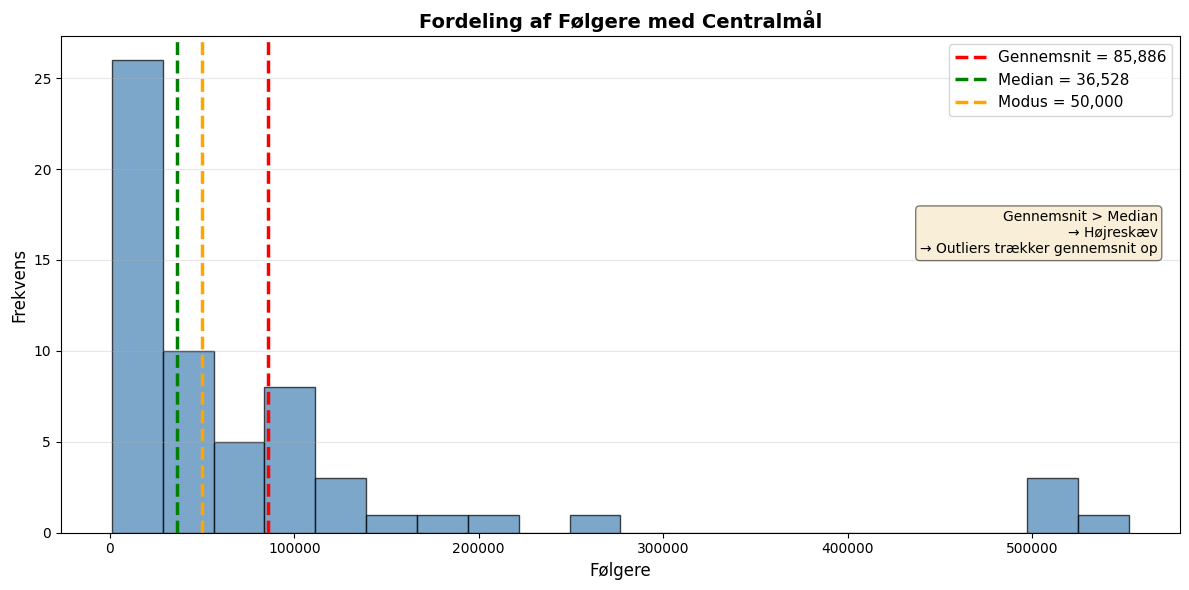

In [13]:
# Opret histogram med centralmål
plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(followers, bins=20, color='steelblue', alpha=0.7, edgecolor='black')

# Tilføj lodrette linjer for gennemsnit og median
plt.axvline(mean_pandas, color='red', linestyle='--', linewidth=2.5, 
            label=f'Gennemsnit = {mean_pandas:,.0f}')
plt.axvline(median_pandas, color='green', linestyle='--', linewidth=2.5, 
            label=f'Median = {median_pandas:,.0f}')
plt.axvline(first_mode, color='orange', linestyle='--', linewidth=2.5, 
            label=f'Modus = {first_mode:,.0f}')

# Labels og formatering
plt.xlabel('Følgere', fontsize=12)
plt.ylabel('Frekvens', fontsize=12)
plt.title('Fordeling af Følgere med Centralmål', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(axis='y', alpha=0.3)

# Tilføj annotation om skævhed
plt.text(0.98, 0.65, 'Gennemsnit > Median\n→ Højreskæv\n→ Outliers trækker gennemsnit op', 
         transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

**Vigtige Observationer:**
1. **Gennemsnittet (85.886)** er meget højere end **medianen (36.528)**
2. Dette indikerer **højreskæve** data - nogle få mega-influencers trækker gennemsnittet op
3. **Medianen** repræsenterer bedre den "typiske" influencer
4. **Modus** viser clustering ved runde tal (50k, 100k)

### 1.5 Outlier-følsomhed: Gennemsnit vs Median

**Spørgsmål:** Hvad sker der med gennemsnit og median når vi har ekstreme outliers?

Lad os demonstrere dette ved at undersøge vores data med og uden top-influenceren.

In [14]:
# Find top-influenceren
max_followers = followers.max()
top_influencer = df[df['followers'] == max_followers]

print("Top-influencer:")
print(top_influencer[['influencer_id', 'followers', 'category', 'platform']])
print(f"\nDenne influencer har {max_followers:,} følgere!")

Top-influencer:
   influencer_id  followers category   platform
26          I027     552733  Fitness  Instagram

Denne influencer har 552,733 følgere!


In [15]:
# Beregn statistikker UDEN top-outliersn
followers_without_outlier = followers[followers != max_followers]

mean_without = followers_without_outlier.mean()
median_without = followers_without_outlier.median()

# Sammenlign
print("=" * 60)
print("OUTLIER-FØLSOMHED SAMMENLIGNING")
print("=" * 60)
print(f"{'Mål':<15} {'Med Outlier':>18} {'Uden Outlier':>20} {'% Ændring':>12}")
print("-" * 60)

mean_change = ((mean_without - mean_pandas) / mean_pandas) * 100
median_change = ((median_without - median_pandas) / median_pandas) * 100

print(f"{'Gennemsnit':<15} {mean_pandas:>18,.2f} {mean_without:>20,.2f} {mean_change:>11.1f}%")
print(f"{'Median':<15} {median_pandas:>18,.2f} {median_without:>20,.2f} {median_change:>11.1f}%")
print("=" * 60)

print(f"\n→ Gennemsnit ændrede sig med {abs(mean_change):.1f}%")
print(f"→ Median ændrede sig med {abs(median_change):.1f}%")
print(f"\n✓ Median er ROBUST over for outliers")
print(f"✗ Gennemsnit er FØLSOMT over for outliers")

OUTLIER-FØLSOMHED SAMMENLIGNING
Mål                    Med Outlier         Uden Outlier    % Ændring
------------------------------------------------------------
Gennemsnit               85,885.92            77,973.25        -9.2%
Median                   36,528.00            36,075.00        -1.2%

→ Gennemsnit ændrede sig med 9.2%
→ Median ændrede sig med 1.2%

✓ Median er ROBUST over for outliers
✗ Gennemsnit er FØLSOMT over for outliers


### 1.6 Beslutningsregel: Hvornår Bruges Gennemsnit vs Median?

**Brug GENNEMSNIT når:**
- Data er cirka symmetrisk (ingen skævhed)
- Ingen ekstreme outliers er til stede
- Du vil bruge al information i dataen

**Brug MEDIAN når:**
- Data er skæv (venstre eller højre)
- Outliers er til stede
- Du vil have et mål, der er modstandsdygtigt over for ekstreme værdier

**Brug MODUS når:**
- Arbejder med kategorisk/nominal data
- Vil finde den mest almindelige værdi
- Bruges sjældent alene for interval-data

---
## 2. Mål for Variabilitet (Measures of Variability)

**Nøglespørgsmål:** Hvor spredt er vores data? Hvor meget varierer værdierne?

At kende centrum (gennemsnit/median) er ikke nok - vi skal også kende, hvor spredt dataen er.

Vi demonstrerer variabilitetsmål ved hjælp af **engagement_rate** fordi:
- Mere symmetrisk fordeling (god til varians/SD fortolkning)
- Lettere at fortolke (procentværdier)
- Mindre tal gør manuelle beregninger klarere

In [16]:
# Udtræk engagement rate data
engagement_rate = df['engagement_rate']

print(f"Engagement rate statistik:")
print(f"  Min:         {engagement_rate.min():.2f}%")
print(f"  Max:         {engagement_rate.max():.2f}%")
print(f"  Gennemsnit:  {engagement_rate.mean():.2f}%")
print(f"  Median:      {engagement_rate.median():.2f}%")

Engagement rate statistik:
  Min:         1.12%
  Max:         7.81%
  Gennemsnit:  4.27%
  Median:      4.61%


### 2.1 Variationsbredde (Range)

**Definition:** Forskellen mellem den største og mindste værdi.

**Formel:** $\text{Range} = \text{Maximum} - \text{Minimum}$

In [17]:
# Beregn variationsbredde manuelt
min_value = engagement_rate.min()
max_value = engagement_rate.max()
range_manual = max_value - min_value

print(f"Minimum engagement rate: {min_value:.2f}%")
print(f"Maximum engagement rate: {max_value:.2f}%")
print(f"\nRange = {max_value:.2f}% - {min_value:.2f}% = {range_manual:.2f}%")

# Bemærk: pandas har ikke en indbygget .range() metode, men vi kan bruge max() - min()
range_pandas = engagement_rate.max() - engagement_rate.min()
print(f"\nRange (pandas): {range_pandas:.2f}%")

Minimum engagement rate: 1.12%
Maximum engagement rate: 7.81%

Range = 7.81% - 1.12% = 6.69%

Range (pandas): 6.69%


**Fortolkning:** Engagement rates varierer med **6,69 procentpoint** på tværs af influencers.

**Begrænsning:** Range bruger kun to værdier (min og max) og er meget følsom over for outliers.

### 2.2 Varians og Standardafvigelse

**Varians** måler den gennemsnitlige kvadrerede afvigelse fra gennemsnittet.  
**Standardafvigelse** er kvadratroden af variansen (returnerer til oprindelige enheder).

**Population Varians:** $\sigma^2 = \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}$

**Stikprøve Varians:** $s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}$

**Bemærk:** Vi dividerer med $(n-1)$ for stikprøver (ikke $n$) for at få en unbiased estimator.

#### Metode 1: Beregn Varians Manuelt (Trin-for-trin)

In [18]:
# Trin 1: Beregn gennemsnittet
mean_eng = engagement_rate.mean()
print(f"Trin 1 - Gennemsnitlig engagement rate: {mean_eng:.2f}%")

# Trin 2: Beregn afvigelser fra gennemsnittet
deviations = engagement_rate - mean_eng
print(f"\nTrin 2 - Afvigelser fra gennemsnit (første 5):")
print(deviations.head())

# Trin 3: Kvadrer afvigelserne
squared_deviations = deviations ** 2
print(f"\nTrin 3 - Kvadrerede afvigelser (første 5):")
print(squared_deviations.head())

# Trin 4: Summer de kvadrerede afvigelser
sum_squared_dev = squared_deviations.sum()
print(f"\nTrin 4 - Sum af kvadrerede afvigelser: {sum_squared_dev:.4f}")

# Trin 5: Divider med (n-1) for stikprøve-varians
n = len(engagement_rate)
variance_manual = sum_squared_dev / (n - 1)
print(f"\nTrin 5 - Varians = {sum_squared_dev:.4f} / ({n} - 1) = {variance_manual:.4f}")

Trin 1 - Gennemsnitlig engagement rate: 4.27%

Trin 2 - Afvigelser fra gennemsnit (første 5):
0    1.57
1   -0.27
2   -0.27
3    0.78
4    0.97
Name: engagement_rate, dtype: float64

Trin 3 - Kvadrerede afvigelser (første 5):
0    2.47
1    0.07
2    0.07
3    0.61
4    0.94
Name: engagement_rate, dtype: float64

Trin 4 - Sum af kvadrerede afvigelser: 173.6887

Trin 5 - Varians = 173.6887 / (60 - 1) = 2.9439


#### Metode 2: Brug Pandas (Pythonic Måde)

In [19]:
# Beregn varians ved hjælp af pandas
# BEMÆRK: pandas bruger ddof=1 som standard (dividerer med n-1 for stikprøve-varians)
variance_pandas = engagement_rate.var()

print(f"Varians (pandas):  {variance_pandas:.4f}")
print(f"Varians (manuel):  {variance_manual:.4f}")
print(f"\nForskel: {abs(variance_pandas - variance_manual):.10f}")

# Hvis du ville have POPULATION varians (divider med n i stedet for n-1):
variance_population = engagement_rate.var(ddof=0)
print(f"\nPopulation varians (ddof=0): {variance_population:.4f}")

Varians (pandas):  2.9439
Varians (manuel):  2.9439

Forskel: 0.0000000000

Population varians (ddof=0): 2.8948


**Bemærk:** Varians-enheder er **kvadreret** (f.eks. %²), hvilket er svært at fortolke. Derfor bruger vi standardafvigelse!

#### Standardafvigelse: Konvertering Tilbage til Oprindelige Enheder

In [20]:
# Beregn standardafvigelse manuelt (kvadratrod af varians)
std_manual = np.sqrt(variance_manual)
print(f"Standardafvigelse (manuel): {std_manual:.4f}%")

# Beregn ved hjælp af pandas
std_pandas = engagement_rate.std()
print(f"Standardafvigelse (pandas): {std_pandas:.4f}%")

print(f"\n→ Standardafvigelsen er {std_pandas:.2f} procentpoint.")

Standardafvigelse (manuel): 1.7158%
Standardafvigelse (pandas): 1.7158%

→ Standardafvigelsen er 1.72 procentpoint.


**Fortolkning:** I gennemsnit afviger engagement rates fra gennemsnittet med cirka **1,72 procentpoint**.

### 2.3 Fortolkning af Standardafvigelse

Standardafvigelse fortæller os om den **typiske afstand** fra gennemsnittet:
- **Lille SD**: Data klumpet tæt omkring gennemsnit (lav variabilitet)
- **Stor SD**: Data spredt vidt (høj variabilitet)

In [21]:
# Sammenfatning af statistikker
print("=" * 50)
print("ENGAGEMENT RATE VARIABILITET - OVERSIGT")
print("=" * 50)
print(f"Gennemsnit:         {mean_eng:.2f}%")
print(f"Standardafvigelse:  {std_pandas:.2f}%")
print(f"Range:              {range_pandas:.2f}%")
print("=" * 50)

# Beregn intervaller
one_sd_lower = mean_eng - std_pandas
one_sd_upper = mean_eng + std_pandas
two_sd_lower = mean_eng - 2*std_pandas
two_sd_upper = mean_eng + 2*std_pandas

print(f"\nGennemsnit ± 1 SD: [{one_sd_lower:.2f}%, {one_sd_upper:.2f}%]")
print(f"Gennemsnit ± 2 SD: [{two_sd_lower:.2f}%, {two_sd_upper:.2f}%]")

ENGAGEMENT RATE VARIABILITET - OVERSIGT
Gennemsnit:         4.27%
Standardafvigelse:  1.72%
Range:              6.69%

Gennemsnit ± 1 SD: [2.55%, 5.98%]
Gennemsnit ± 2 SD: [0.84%, 7.70%]


### 2.4 Den Empiriske Regel (68-95-99,7 Reglen)

For **klokkeformede (normale) fordelinger** gælder cirka:
- **68%** af data falder inden for **1 standardafvigelse** fra gennemsnittet
- **95%** af data falder inden for **2 standardafvigelser** fra gennemsnittet
- **99,7%** af data falder inden for **3 standardafvigelser** fra gennemsnittet

Lad os teste dette på **posts_per_week** (som er meget symmetrisk):

In [22]:
# Brug posts_per_week (symmetrisk fordeling)
posts = df['posts_per_week']

posts_mean = posts.mean()
posts_std = posts.std()

print(f"Posts per Uge: Gennemsnit = {posts_mean:.2f}, SD = {posts_std:.2f}")

# Tæl observationer inden for 1, 2 og 3 standardafvigelser
within_1sd = ((posts >= posts_mean - posts_std) & (posts <= posts_mean + posts_std)).sum()
within_2sd = ((posts >= posts_mean - 2*posts_std) & (posts <= posts_mean + 2*posts_std)).sum()
within_3sd = ((posts >= posts_mean - 3*posts_std) & (posts <= posts_mean + 3*posts_std)).sum()

n = len(posts)
pct_1sd = (within_1sd / n) * 100
pct_2sd = (within_2sd / n) * 100
pct_3sd = (within_3sd / n) * 100

print("\n" + "=" * 60)
print("EMPIRISK REGEL VERIFIKATION")
print("=" * 60)
print(f"{'Interval':<20} {'Forventet':>12} {'Faktisk':>12} {'Match?':>12}")
print("-" * 60)
print(f"{'Gennemsnit ± 1 SD':<20} {'~68%':>12} {pct_1sd:>11.1f}% {'✓' if 60 < pct_1sd < 75 else '✗':>12}")
print(f"{'Gennemsnit ± 2 SD':<20} {'~95%':>12} {pct_2sd:>11.1f}% {'✓' if 90 < pct_2sd < 100 else '✗':>12}")
print(f"{'Gennemsnit ± 3 SD':<20} {'~99,7%':>12} {pct_3sd:>11.1f}% {'✓' if 99 < pct_3sd <= 100 else '✗':>12}")
print("=" * 60)

Posts per Uge: Gennemsnit = 5.27, SD = 1.14

EMPIRISK REGEL VERIFIKATION
Interval                Forventet      Faktisk       Match?
------------------------------------------------------------
Gennemsnit ± 1 SD            ~68%        60.0%            ✗
Gennemsnit ± 2 SD            ~95%       100.0%            ✗
Gennemsnit ± 3 SD          ~99,7%       100.0%            ✓


### Visualisering: Fordeling med Standardafvigelse-bånd

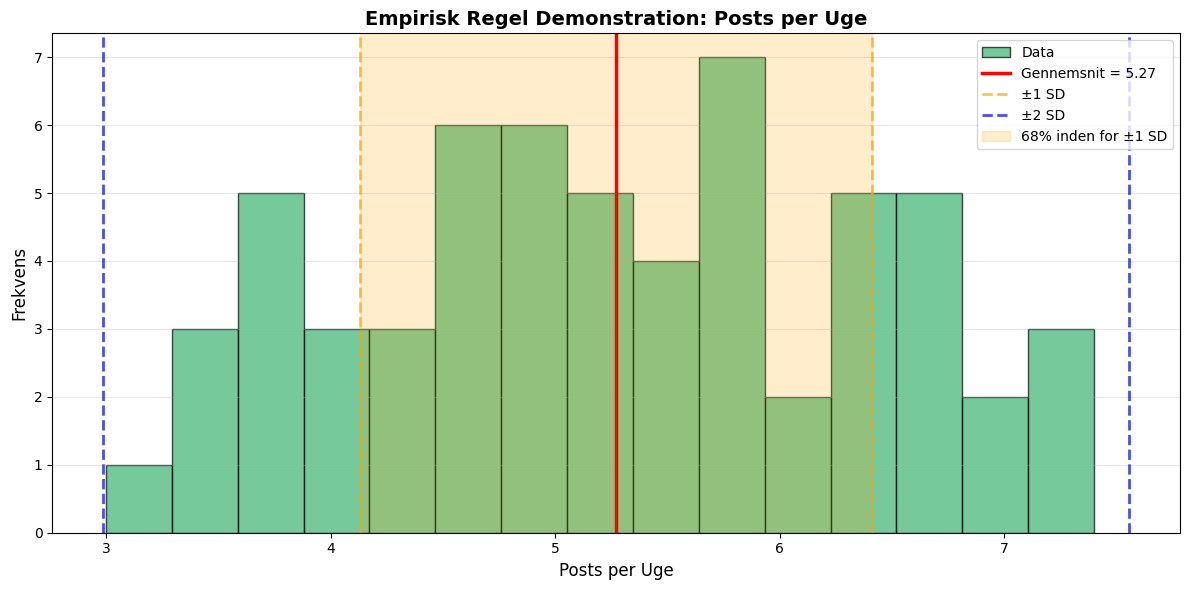


✓ For symmetriske fordelinger hjælper den Empiriske Regel os med at forstå dataspredning.
✓ 60.0% af influencers poster mellem 4.1 og 6.4 gange per uge.


In [23]:
# Opret visualisering der viser den Empiriske Regel
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram
ax.hist(posts, bins=15, color='mediumseagreen', alpha=0.7, edgecolor='black', label='Data')

# Tilføj gennemsnitslinje
ax.axvline(posts_mean, color='red', linestyle='-', linewidth=2.5, label=f'Gennemsnit = {posts_mean:.2f}')

# Tilføj SD-bånd
ax.axvline(posts_mean - posts_std, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='±1 SD')
ax.axvline(posts_mean + posts_std, color='orange', linestyle='--', linewidth=2, alpha=0.7)

ax.axvline(posts_mean - 2*posts_std, color='blue', linestyle='--', linewidth=2, alpha=0.7, label='±2 SD')
ax.axvline(posts_mean + 2*posts_std, color='blue', linestyle='--', linewidth=2, alpha=0.7)

# Skyggelægning for 1 SD
ax.axvspan(posts_mean - posts_std, posts_mean + posts_std, alpha=0.2, color='orange', label='68% inden for ±1 SD')

# Labels
ax.set_xlabel('Posts per Uge', fontsize=12)
ax.set_ylabel('Frekvens', fontsize=12)
ax.set_title('Empirisk Regel Demonstration: Posts per Uge', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='upper right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ For symmetriske fordelinger hjælper den Empiriske Regel os med at forstå dataspredning.")
print(f"✓ {pct_1sd:.1f}% af influencers poster mellem {posts_mean-posts_std:.1f} og {posts_mean+posts_std:.1f} gange per uge.")

### 2.5 Variationskoefficient (CV)

**Problem:** Standardafvigelse afhænger af måleskalaen. Hvordan sammenligner vi variabilitet på tværs af forskellige variabler?

**Løsning:** Variationskoefficient = (SD / Gennemsnit) × 100%

**Formel (Stikprøve):** $CV = \frac{s}{\bar{x}} \times 100\%$

**Fortolkning:**
- CV < 20%: Lav variabilitet (konsistent)
- CV = 20-30%: Moderat variabilitet
- CV > 30%: Høj variabilitet (inkonsistent)

In [32]:
# Beregn CV for flere variabler
variables = {
    'Følgere': followers,
    'Engagement Rate': engagement_rate,
    'Posts per Uge': posts
}

print("=" * 70)
print("VARIATIONSKOEFFICIENT SAMMENLIGNING")
print("=" * 70)
print(f"{'Variabel':<20} {'Gennemsnit':>15} {'Std.afv':>15} {'CV':>12}")
print("-" * 70)

for name, data in variables.items():
    mean_val = data.mean()
    std_val = data.std()
    cv = (std_val / mean_val) * 100
    print(f"{name:<20} {mean_val:>15.2f} {std_val:>15.2f} {cv:>11.2f}%")

print("=" * 70)

VARIATIONSKOEFFICIENT SAMMENLIGNING
Variabel                  Gennemsnit         Std.afv           CV
----------------------------------------------------------------------
Følgere                     85885.92       127447.72      148.39%
Engagement Rate                 4.27            1.72       40.20%
Posts per Uge                   5.27            1.14       21.65%


**Fortolkning:**
- **Følgere** har den højeste CV (~148%) - ekstremt variabel på tværs af influencers
- **Engagement Rate** har moderat CV (~40%) - noget konsistens men variation eksisterer
- **Posts per Uge** har laveste CV (~22%) - mest konsistent adfærd

**Hvorfor CV betyder noget:** Du kan ikke sammenligne SD=127.448 (følgere) med SD=1,72 (engagement rate) direkte, fordi de er på forskellige skalaer. Men CV viser, at følgere er meget mere variable relativt til deres gennemsnit.

In [38]:
# Som altid er der en pakke til dette:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.variation.html
from scipy.stats import variation
print(variation(followers, ddof=1) * 100)  # Konverter til procent 
# ddof = degrees of freedom, som standard er den sat til 0 (population), men vi arbejder med sample (ddof=1)
print((followers.std() / followers.mean()) * 100)

148.39187353557736
148.39187353557736


---
## 3. Fordelingsform & Skævhed (Distribution Shape & Skewness)

**Nøglespørgsmål:** Er vores data symmetrisk eller skæv?

**Skævhed** måler asymmetrien i en fordeling:
- **Skævhed ≈ 0**: Symmetrisk fordeling
- **Skævhed > 0**: Højreskæv (halen strækker sig til højre, gennemsnit > median)
- **Skævhed < 0**: Venstreskæv (halen strækker sig til venstre, gennemsnit < median)

In [26]:
# Beregn skævhed for vores hovedvariabler
print("=" * 60)
print("SKÆVHED ANALYSE")
print("=" * 60)
print(f"{'Variabel':<20} {'Gennemsnit':>12} {'Median':>12} {'Skævhed':>12}")
print("-" * 60)

for name, data in variables.items():
    mean_val = data.mean()
    median_val = data.median()
    skew_val = data.skew()
    print(f"{name:<20} {mean_val:>12.2f} {median_val:>12.2f} {skew_val:>12.2f}")

print("=" * 60)

print("\nFortolkning:")
print("  Følgere: MEGET højreskæv (2,64) → Gennemsnit >> Median")
print("  Engagement Rate: Let venstreskæv (-0,31) → Gennemsnit ≈ Median")
print("  Posts per Uge: Næsten symmetrisk (0,03) → Gennemsnit ≈ Median")

SKÆVHED ANALYSE
Variabel               Gennemsnit       Median      Skævhed
------------------------------------------------------------
Følgere                  85885.92     36528.00         2.64
Engagement Rate              4.27         4.61        -0.31
Posts per Uge                5.27         5.20         0.03

Fortolkning:
  Følgere: MEGET højreskæv (2,64) → Gennemsnit >> Median
  Engagement Rate: Let venstreskæv (-0,31) → Gennemsnit ≈ Median
  Posts per Uge: Næsten symmetrisk (0,03) → Gennemsnit ≈ Median


### Visuel Sammenligning: Skæv vs Symmetrisk Fordeling

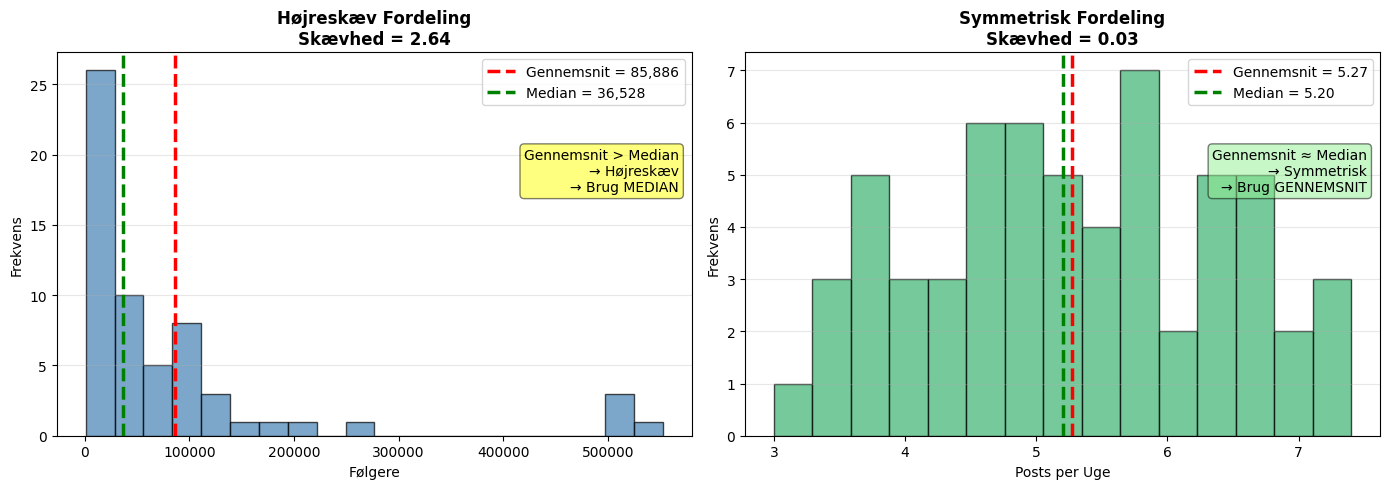

In [27]:
# Opret side-ved-side sammenligning
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Venstre plot: Højreskæv (Følgere)
ax1 = axes[0]
ax1.hist(followers, bins=20, color='steelblue', alpha=0.7, edgecolor='black')
ax1.axvline(followers.mean(), color='red', linestyle='--', linewidth=2.5, label=f'Gennemsnit = {followers.mean():,.0f}')
ax1.axvline(followers.median(), color='green', linestyle='--', linewidth=2.5, label=f'Median = {followers.median():,.0f}')
ax1.set_xlabel('Følgere')
ax1.set_ylabel('Frekvens')
ax1.set_title(f'Højreskæv Fordeling\nSkævhed = {followers.skew():.2f}', fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.text(0.98, 0.75, 'Gennemsnit > Median\n→ Højreskæv\n→ Brug MEDIAN', 
         transform=ax1.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# Højre plot: Symmetrisk (Posts per Uge)
ax2 = axes[1]
ax2.hist(posts, bins=15, color='mediumseagreen', alpha=0.7, edgecolor='black')
ax2.axvline(posts.mean(), color='red', linestyle='--', linewidth=2.5, label=f'Gennemsnit = {posts.mean():.2f}')
ax2.axvline(posts.median(), color='green', linestyle='--', linewidth=2.5, label=f'Median = {posts.median():.2f}')
ax2.set_xlabel('Posts per Uge')
ax2.set_ylabel('Frekvens')
ax2.set_title(f'Symmetrisk Fordeling\nSkævhed = {posts.skew():.2f}', fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
ax2.text(0.98, 0.75, 'Gennemsnit ≈ Median\n→ Symmetrisk\n→ Brug GENNEMSNIT', 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

---
## 4. Relativ Position: Percentiler & Kvartiler

**Nøglespørgsmål:** Hvor står en specifik værdi relativt til resten af dataen?

### 4.1 Percentiler (Percentiles)

**Definition:** Den P-te percentil er den værdi, under hvilken P% af dataen falder.

**Formel for position:** $L_P = \frac{P}{100} \times n$

**Eksempler:**
- 25. percentil (Q1): 25% af data er under denne værdi
- 50. percentil (Q2): Samme som median
- 75. percentil (Q3): 75% af data er under denne værdi

#### Beregn Specifikke Percentiler

Lad os finde nøglepercentiler for følgere:

In [28]:
# Beregn percentiler ved hjælp af pandas/numpy
# Metode: brug .quantile() med decimalværdier (f.eks. 0,25 for 25. percentil)

p10 = followers.quantile(0.10)
p25 = followers.quantile(0.25)
p50 = followers.quantile(0.50)  # Samme som median
p75 = followers.quantile(0.75)
p90 = followers.quantile(0.90)

print("=" * 50)
print("FØLGERE: PERCENTIL ANALYSE")
print("=" * 50)
print(f"10. percentil: {p10:>12,.0f} følgere")
print(f"25. percentil: {p25:>12,.0f} følgere (Q1)")
print(f"50. percentil: {p50:>12,.0f} følgere (Median)")
print(f"75. percentil: {p75:>12,.0f} følgere (Q3)")
print(f"90. percentil: {p90:>12,.0f} følgere")
print("=" * 50)

print("\nFortolkning:")
print(f"  • Kun 10% af influencers har færre end {p10:,.0f} følgere")
print(f"  • Kun 10% af influencers har mere end {p90:,.0f} følgere (Top 10%)")
print(f"  • 50% af influencers har mellem {p25:,.0f} og {p75:,.0f} følgere")

FØLGERE: PERCENTIL ANALYSE
10. percentil:        6,550 følgere
25. percentil:       14,239 følgere (Q1)
50. percentil:       36,528 følgere (Median)
75. percentil:      100,000 følgere (Q3)
90. percentil:      193,367 følgere

Fortolkning:
  • Kun 10% af influencers har færre end 6,550 følgere
  • Kun 10% af influencers har mere end 193,367 følgere (Top 10%)
  • 50% af influencers har mellem 14,239 og 100,000 følgere


#### Manuel Percentil Beregning (Eksempel for 75. Percentil)

In [29]:
# Vis den manuelle beregningslogik for 75. percentil
P = 75  # Vi vil have 75. percentil
n = len(followers)

# Trin 1: Beregn position
L_p = (P / 100) * n
print(f"Trin 1 - Beregn position: L_{P} = ({P}/100) × {n} = {L_p}")

# Trin 2: Sortér dataen
sorted_followers = np.sort(followers)

# Trin 3: Brug NumPy's percentile funktion (som håndterer interpolation)
p75_manual = np.percentile(sorted_followers, 75)
print(f"\nTrin 2 - 75. percentil = {p75_manual:,.0f}")

# Verificer med pandas
p75_pandas = followers.quantile(0.75)
print(f"\nVerifikation (pandas): {p75_pandas:,.0f}")

print(f"\n→ 75% af influencers har {p75_pandas:,.0f} følgere eller færre.")

Trin 1 - Beregn position: L_75 = (75/100) × 60 = 45.0

Trin 2 - 75. percentil = 100,000

Verifikation (pandas): 100,000

→ 75% af influencers har 100,000 følgere eller færre.


### 4.2 Kvartiler (Quartiles) og Interkvartilbredde (IQR)

**Kvartiler** deler data i fire lige store dele:
- **Q1** (25. percentil): Nedre kvartil
- **Q2** (50. percentil): Median
- **Q3** (75. percentil): Øvre kvartil

**Interkvartilbredde (IQR):** $\text{IQR} = Q3 - Q1$

IQR måler spredningen af de **midterste 50%** af dataen (robust over for outliers).

In [ ]:
# Beregn kvartiler og IQR
Q1 = followers.quantile(0.25)
Q2 = followers.quantile(0.50)  # Median
Q3 = followers.quantile(0.75)
IQR = Q3 - Q1

print("=" * 50)
print("KVARTILER OG IQR")
print("=" * 50)
print(f"Q1 (25. percentil): {Q1:>15,.0f}")
print(f"Q2 (50. percentil): {Q2:>15,.0f} (Median)")
print(f"Q3 (75. percentil): {Q3:>15,.0f}")
print("-" * 50)
print(f"IQR = Q3 - Q1:      {IQR:>15,.0f}")
print("=" * 50)

print(f"\nFortolkning:")
print(f"  De midterste 50% af influencers har mellem {Q1:,.0f} og {Q3:,.0f} følgere.")
print(f"  Spredningen af denne midtergruppe er {IQR:,.0f} følgere.")

### 4.3 Outlier-detektion ved Hjælp af IQR

**Regel:** Værdier er potentielle outliers hvis de falder uden for:
- **Nedre grænse:** $Q1 - 1,5 \times IQR$
- **Øvre grænse:** $Q3 + 1,5 \times IQR$

In [ ]:
# Beregn outlier-grænser
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier-detektionsgrænser:")
print(f"  Nedre grænse: {lower_bound:,.0f}")
print(f"  Øvre grænse: {upper_bound:,.0f}")

# Find outliers
outliers_low = followers[followers < lower_bound]
outliers_high = followers[followers > upper_bound]

print(f"\nAntal outliers:")
print(f"  Under nedre grænse: {len(outliers_low)}")
print(f"  Over øvre grænse: {len(outliers_high)}")

if len(outliers_high) > 0:
    print(f"\nHøje outliers (influencers med > {upper_bound:,.0f} følgere):")
    high_outlier_influencers = df[followers > upper_bound][['influencer_id', 'followers', 'category', 'platform']]
    print(high_outlier_influencers.sort_values('followers', ascending=False))

### Box Plot: Visualisering af Kvartiler, IQR og Outliers

In [ ]:
# Opret box plot
fig, ax = plt.subplots(figsize=(10, 6))

# Opret box plot
bp = ax.boxplot([followers], vert=False, widths=0.5, patch_artist=True,
                 boxprops=dict(facecolor='steelblue', alpha=0.7),
                 medianprops=dict(color='red', linewidth=2.5),
                 whiskerprops=dict(linewidth=1.5),
                 capprops=dict(linewidth=1.5),
                 flierprops=dict(marker='o', markerfacecolor='red', markersize=8, alpha=0.7))

# Tilføj labels for nøgleværdier
ax.text(Q1, 1.15, f'Q1\n{Q1:,.0f}', ha='center', fontsize=10, fontweight='bold')
ax.text(Q2, 1.15, f'Median\n{Q2:,.0f}', ha='center', fontsize=10, fontweight='bold', color='red')
ax.text(Q3, 1.15, f'Q3\n{Q3:,.0f}', ha='center', fontsize=10, fontweight='bold')

# Tilføj IQR annotation
ax.annotate('', xy=(Q3, 0.85), xytext=(Q1, 0.85),
            arrowprops=dict(arrowstyle='<->', color='green', lw=2))
ax.text((Q1 + Q3) / 2, 0.75, f'IQR = {IQR:,.0f}', ha='center', fontsize=11, 
        fontweight='bold', color='green',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax.set_xlabel('Følgere', fontsize=12)
ax.set_title('Box Plot: Fordeling af Følgere\nViser Kvartiler, IQR og Outliers', 
             fontsize=14, fontweight='bold')
ax.set_yticks([])
ax.grid(axis='x', alpha=0.3)

# Tilføj forklaring
explanation = (
    "Boks: Q1 til Q3 (midterste 50%)\n"
    "Rød linje: Median (Q2)\n"
    "Whiskers: 1,5×IQR fra kvartiler\n"
    "Røde prikker: Outliers"
)
ax.text(0.98, 0.95, explanation, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n✓ Box plots er fremragende til at sammenligne fordelinger og identificere outliers.")

---
## 5. Alt på Én Gang (Putting It All Together)

### 5.1 Kraften i `.describe()`: Alle Statistikker på Én Gang

I stedet for at beregne hvert mål separat, giver pandas' `.describe()` dig de fleste deskriptive statistikker i ét kald:

In [ ]:
# Få alle deskriptive statistikker på én gang
print("KOMPLET DESKRIPTIV STATISTIK:")
print("=" * 70)
print("\nFølgere:")
print(followers.describe())

print("\nEngagement Rate:")
print(engagement_rate.describe())

print("\nPosts per Uge:")
print(posts.describe())

**Hvad `.describe()` giver dig:**
- **count**: Antal ikke-manglende observationer
- **mean**: Aritmetisk gennemsnit
- **std**: Standardafvigelse
- **min**: Minimumsværdi
- **25%**: Første kvartil (Q1)
- **50%**: Median (Q2)
- **75%**: Tredje kvartil (Q3)
- **max**: Maksimumsværdi

**Hvad der mangler:** Modus, CV, Skævhed, IQR (men du kan beregne disse separat hvis nødvendigt)

In [ ]:
# Du kan også få describe() for hele dataframe
print("\nDeskriptiv statistik for ALLE numeriske variabler:")
print(df.describe())

### 5.2 Hurtig Reference: Python Kommandoer til Deskriptiv Statistik

Brug denne tabel som reference under eksamen:

| Mål | Python Kommando | Eksempel |
|---------|----------------|----------|
| **Gennemsnit** | `.mean()` | `followers.mean()` |
| **Median** | `.median()` | `followers.median()` |
| **Modus** | `.mode()[0]` | `followers.mode()[0]` |
| **Varians** | `.var()` | `followers.var()` |
| **Standardafvigelse** | `.std()` | `followers.std()` |
| **Min** | `.min()` | `followers.min()` |
| **Max** | `.max()` | `followers.max()` |
| **Range** | `.max() - .min()` | `followers.max() - followers.min()` |
| **Percentil** | `.quantile(p)` | `followers.quantile(0.75)` |
| **Q1, Q3** | `.quantile([0.25, 0.75])` | `followers.quantile([0.25, 0.75])` |
| **IQR** | `Q3 - Q1` | `followers.quantile(0.75) - followers.quantile(0.25)` |
| **Skævhed** | `.skew()` | `followers.skew()` |
| **Alt på én gang** | `.describe()` | `followers.describe()` |

---
## Opsummering: Vigtigste Læringspunkter

**1. Centralmål:**
- Gennemsnit = balancepunkt (følsom over for outliers)
- Median = midterværdi (robust over for outliers)
- Modus = mest almindelig (bruges sjældent for kontinuerlig data)

**2. Variabilitetsmål:**
- Standardafvigelse = typisk afstand fra gennemsnit
- IQR = spredning af midterste 50% (robust)
- CV = relativ variabilitet (tillader sammenligning på tværs af skalaer)

**3. Fordelingsform:**
- Skævhed fortæller om gennemsnit > median (højreskæv) eller gennemsnit < median (venstreskæv)
- Empirisk Regel virker for symmetriske (klokkeformede) data

**4. Relativ Position:**
- Percentiler fortæller hvilken % af data der falder under en værdi
- Kvartiler deler data i fire lige store dele
- IQR hjælper med at identificere outliers

**5. Den Gyldne Regel:**
**Rapportér ALTID centrum OG variabilitet sammen** - det ene uden det andet er ufuldstændigt!

---